# Table of Contents

01 Importing Libraries <br />
02 Importing Data <br />
03 Security Risk Analysis <br />
04 Quick Cleaning/Dataframe Manipulation <br />
- Merging Departments (df_dep) with Main Dataframe (df_com)
- Cleaning/Doubechecking data

05 Creating a Regional Column
- Region Flag Code
- Spending Habits between Regions

06 Creating an Exclusion Flag for low-activity customers (less than 5 orders) <br />
07 Creating Customer Profiles
- Checking Variables for Context
- Creating New Columns for Customer Profile
  - Income Range Column
  - Age Range Column
  - Customer Profile Column
  - Shop Day Column
- Creating Separate Dataframe for Qualitative Analysis 

08 Visualizing Basic Customer Distribution Data <br /> 
09 Aggregating and Analyzing Expenditure and Usage-Frequency for Customers 
- Expenditure
  - Analyzing Customer Profile Expenditure
  - Expenditure Insights
  - Expenditure Visualizations
- Usage-Frequency
 - Analyzing Usage-Frequency
 - Usage-Frequency Insights
 - Usage-Frequency Visualizations

10 Region and Department Analysis
- Region Analysis
  - Income Range Distribution by Region
  - Age Range Distribution by Region
- Department Analysis
  - Top 5 Departments for Each Region
  - Top 5 Departments for Each Income Range
  - Top 5 Departments for Each Age Range
  - Top 5 Departments for Each Customer Profile
  - Top Departments based on Shop Day


# 01 Importing Libaries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Data

In [2]:
# Create basic path
path = r'A:\Python\11-2023 Instacart Basket Analysis'

In [3]:
# Importing customers_orders_merged_49 dataset
df_com = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_merged_49.pkl'))

In [4]:
# Import "departments.csv" data set into notebook using os library
df_dep = pd.read_csv(os.path.join(path, '02 Data' , 'Original Data', 'departments.csv'),index_col = False)

# 03 Security Risk Analysis

In [5]:
# Checking Dataset
df_com.head()

,user_id,Gender,State,Age,date_joined,dependants,fam_status,income,product_id,product_name,...,price_range,Store_Actvitiy,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Busiest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regular Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Busiest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regular Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Slowest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both


In [6]:
# Viewing all columns in dataset
list(df_com.columns.values)

['user_id',
 'Gender',
 'State',
 'Age',
 'date_joined',
 'dependants',
 'fam_status',
 'income',
 'product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range',
 'Store_Actvitiy',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'avg_spent',
 'spending_flag',
 'median_order_frequency',
 'frequency_flag',
 '_merge']

In [7]:
#Creating variable to view Specific Columns
columns = ['user_id','order_number','order_id','department_id','product_name','order_dow','order_hour_of_day']

In [8]:
#Viewing Columns
df_com[columns].head(17)

,user_id,order_number,order_id,department_id,product_name,order_dow,order_hour_of_day
0,26711,5,2543867,7,Soda,1,9
1,26711,7,1285508,7,Soda,5,15
2,26711,8,2578584,7,Soda,1,15
3,26711,1,518967,4,Clementines,2,9
4,26711,3,2524893,4,Clementines,3,11
5,26711,4,2984525,4,Clementines,1,17
6,26711,5,2543867,4,Clementines,1,9
7,26711,6,2505178,4,Clementines,1,8
8,26711,7,1285508,4,Clementines,5,15
9,26711,8,2578584,4,Clementines,1,15


## Insight (Security Risk)

Regarding Security for any personal identifiable information, there isn't any. In the original dataframe (df_com), both First and Last name were included (which would be personal identifiable information), but I
opted to remove it in a prior exercise since it wasn't necessary for analysis. 

# 04 Quick Cleaning/ Dataframe Manipulation

## Merging Departments (df_dep) with Main Dataframe (df_com) 

In [9]:
#Viewing df_dep
df_dep

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [10]:
# Transposing dataframe
df_depT = df_dep.T
df_depT

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [11]:
# Resetting Index
df_depT.reset_index(inplace=True)

In [12]:
#Creating a New Header
new_header = df_depT.iloc[0]
new_header

index    department_id
0           department
Name: 0, dtype: object

In [13]:
#Copying New Dataframe
df_depT_new = df_depT[1:]
df_depT_new

,index,0
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [14]:
# Creating new Deparments Dataframe
df_depT_new.columns = new_header
df_depT_new

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [15]:
#Checking Datatypes for columns 
df_depT_new.dtypes

0
department_id    object
department       object
dtype: object

In [16]:
#Checking Datatypes for df_com
df_com.dtypes

user_id                      int64
Gender                      object
State                       object
Age                          int64
date_joined                 object
dependants                   int64
fam_status                  object
income                       int64
product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
order_id                     int64
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
add_to_cart_order            int64
reordered                    int64
price_range                 object
Store_Actvitiy              object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_spent                  float64
spending_flag               object
median_order_frequency     float64
frequency_flag      

In [17]:
# Changing department_id on df_depT_new to integer instead of object (to match for merge)
df_depT_new['department_id'] = df_depT_new['department_id'].astype('int64')

C:\Users\Rajit\AppData\Local\Temp\ipykernel_6396\913148092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depT_new['department_id'] = df_depT_new['department_id'].astype('int64')


In [18]:
#Checking Datatypes for columns 
df_depT_new.dtypes

0
department_id     int64
department       object
dtype: object

In [19]:
# Merging df_dep with df_com for new dataframe
df_merged = df_com.merge(df_depT_new, on = 'department_id', how = 'left')

In [20]:
#Checking if merged worked
test_columns = ['department_id','department']

In [21]:
df_merged[test_columns]

,department_id,department
0,7,beverages
1,7,beverages
2,7,beverages
3,4,produce
4,4,produce
...,...,...
32404854,19,snacks
32404855,19,snacks
32404856,19,snacks
32404857,19,snacks


## Cleaning Dataframe/Doublechecking

In [22]:
df_merged.head()

,user_id,Gender,State,Age,date_joined,dependants,fam_status,income,product_id,product_name,...,Store_Actvitiy,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,frequency_flag,_merge,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regular Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Slowest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,produce


In [23]:
#Removing Duplicates (double check)
df_comC = df_merged.drop_duplicates()

In [24]:
len(df_com)

32404859

In [25]:
len(df_comC)

32404859

In [26]:
#Dropping Merge column
df_comC.drop(columns = ['_merge'],inplace=True)

In [27]:
df_comC.dtypes

user_id                     int64
Gender                     object
State                      object
Age                         int64
date_joined                object
dependants                  int64
fam_status                 object
income                      int64
product_id                  int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
order_id                    int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
add_to_cart_order           int64
reordered                   int64
price_range                object
Store_Actvitiy             object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
avg_spent                 float64
spending_flag              object
median_order_frequency    float64
frequency_flag             object
department    

# 05 Creating a Region Column

## Region Flag Code

In [28]:
# Defining the list of states for each region
east_region = ['Maine','New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota' , 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida','Kentucky', 'Tennessee', 'Mississippi', 'Alabama','Oklahoma', 'Texas', 
                    'Arkansas', 'Louisiana']
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [29]:
#Creating Region Column 
df_comC['Region'] = 'N/A'

In [30]:
#Using loc function to define all East States
df_comC.loc[df_comC['State'].isin(east_region), 'Region'] = 'East'

In [31]:
#Using loc function to define all Midwest States
df_comC.loc[df_comC['State'].isin(midwest_region), 'Region'] = 'Midwest'

In [32]:
#Using loc function to define all West States
df_comC.loc[df_comC['State'].isin(west_region), 'Region'] = 'West'

In [33]:
#Using loc function to define all South States
df_comC.loc[df_comC['State'].isin(south_region), 'Region'] = 'South'

In [34]:
#Checking Region Flag
df_comC['Region'].value_counts(dropna = False)

Region
South      10791885
West        8292913
Midwest     7597325
East        5722736
Name: count, dtype: int64

In [35]:
df_comC.head()

,user_id,Gender,State,Age,date_joined,dependants,fam_status,income,product_id,product_name,...,Store_Actvitiy,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,frequency_flag,department,Region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regular Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,produce,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Slowest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,produce,Midwest


## Spending Habits between U.S. Regions

In [36]:
#Aggregating Spending Flag based on Region (Creating new dataframe)
df_spending = df_comC.groupby('Region').spending_flag

In [38]:
#Displaying distribution of spending habits based on U.S. Region
df_spending.value_counts(dropna = False)

Region   spending_flag
East     Low Spender       5614511
         High Spender       108225
Midwest  Low Spender       7441350
         High Spender       155975
South    Low Spender      10582194
         High Spender       209691
West     Low Spender       8132559
         High Spender       160354
Name: count, dtype: int64

### Insights

There are significantly more low spenders compared to high spenders across each Region

# 06 Creating an Exclusion Flag for low-activity customers (less than 5 orders)

In [39]:
# Create an exclusion flag for low activity customers (customers with atleast 5 orders)
df_5plus_com = df_comC[df_comC['max_order'] >= 5]

In [40]:
# Checking for minimum 
df_5plus_com['max_order'].min()

5

In [41]:
#Checking length of data subset
len(df_5plus_com)

30964564

In [42]:
#Checking length of original dataframe
len(df_com)

32404859

# 07 Creating Customer Profiles

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## Checking Variables for Context

In [43]:
df_5plus_com['fam_status'].value_counts(dropna = False)

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [44]:
df_5plus_com['Age'].value_counts(dropna = False)

Age
79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: count, Length: 64, dtype: int64

In [45]:
df_5plus_com['dependants'].value_counts(dropna = False)

dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [46]:
df_5plus_com['department_id'].value_counts(dropna = False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

## Creating New Columns for Customer Profile

I'm opting to create multiple columns to better understand the customer over just a singular one because I think having a single column for everything won't provide the best picture/will make it difficult to properly view all the different variations of customers

### Income Range Column

The tiers I will use for income range are as folllows: <br>
Lower Class: Less than 50,000 Income <br>
Middle Class: Between 50,000 and 100,000 <br>
Upper Class: Between 100,000 and 250,000 <br>
Wealthy: 250,000+

In [47]:
# Get Minimum Value of Income
df_5plus_com['income'].min()

25903

In [48]:
# Get Maximum Value of Income
df_5plus_com['income'].max()

593901

In [50]:
#Creating New column (Income_Range) and defining Lower Class Customers
df_5plus_com.loc[df_5plus_com['income'] < 50000, 'Income_Range'] = 'Lower Class'

In [51]:
#Defining Middle Class
df_5plus_com.loc[(df_5plus_com['income'] > 50000) & (df_5plus_com['income'] <= 100000), 'Income_Range'] = 'Middle Class'

In [52]:
#Defining Upper Class
df_5plus_com.loc[(df_5plus_com['income'] > 100000) & (df_5plus_com['income'] <= 250000), 'Income_Range'] = 'Upper Class'

In [53]:
#Defining Wealthy
df_5plus_com.loc[df_5plus_com['income'] > 250000, 'Income_Range'] = 'Wealthy'

In [54]:
#Viewing Distribution of Income
df_5plus_com['Income_Range'].value_counts(dropna = False)

Income_Range
Upper Class     14027250
Middle Class    13394982
Lower Class      3362554
Wealthy           179778
Name: count, dtype: int64

In [55]:
df_5plus_com.head()

,user_id,Gender,State,Age,date_joined,dependants,fam_status,income,product_id,product_name,...,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,frequency_flag,department,Region,Income_Range
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages,Midwest,Upper Class
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages,Midwest,Upper Class
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages,Midwest,Upper Class
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,produce,Midwest,Upper Class
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,produce,Midwest,Upper Class


### Age Range Column

In [56]:
# Checking Minimum Age Value in Dataframe
df_5plus_com['Age'].min()

18

In [57]:
# Checking Maximum Age Value in Dataframe
df_5plus_com['Age'].max()

81

The Age Ranges I will use are as follows: <br>
Young Adult: 18-35 <br>
Middle Adult: 35-64 <br>
Late Adult: 65+

In [59]:
# Creating New Column "Age Range" and Defining Young Adults 
df_5plus_com.loc[(df_5plus_com['Age'] > 17) & (df_5plus_com['Age'] <= 35 ), 'Age_Range'] = 'Young Adult'

In [60]:
# Defining Middle Adults for the column
df_5plus_com.loc[(df_5plus_com['Age'] > 35) & (df_5plus_com['Age'] <= 64 ), 'Age_Range'] = 'Middle Adult'

In [61]:
# Defining Late Adults for the column
df_5plus_com.loc[df_5plus_com['Age'] > 64, 'Age_Range'] = 'Late Adult'

In [62]:
# Viewing Age Distribution
df_5plus_com['Age_Range'].value_counts(dropna = False)

Age_Range
Middle Adult    14030215
Young Adult      8738805
Late Adult       8195544
Name: count, dtype: int64

### Customer Profile Column

In [64]:
# Separating people who are classified as Young Adult while also have atleast 1 dependant
df_5plus_com.loc[(df_5plus_com['Age_Range'] == 'Young Adult') & (df_5plus_com['dependants'] >= 1 ), 'Customer_Profile'] = 'Young Parent'

In [65]:
# Separating people who are classified as Middle Adult while also have atleast 1 dependant
df_5plus_com.loc[(df_5plus_com['Age_Range'] == 'Middle Adult') & (df_5plus_com['dependants'] >= 1 ), 'Customer_Profile'] = 'Middle Parent'

In [66]:
# Separating people who are classified as Late Adult while also have atleast 1 dependant
df_5plus_com.loc[(df_5plus_com['Age_Range'] == 'Late Adult') & (df_5plus_com['dependants'] >= 1 ), 'Customer_Profile'] = 'Late Parent'

In [67]:
# Creating Single Young Adult Category
df_5plus_com.loc[(df_5plus_com['Age_Range'] == 'Young Adult') & (df_5plus_com['dependants'] == 0 ), 'Customer_Profile'] = 'Single Young Adult'

In [68]:
# Creating Single Middle Adult Category
df_5plus_com.loc[(df_5plus_com['Age_Range'] == 'Middle Adult') & (df_5plus_com['dependants'] == 0 ), 'Customer_Profile'] = 'Single Middle Adult'

In [69]:
# Creating Single Late Adult Category
df_5plus_com.loc[(df_5plus_com['Age_Range'] == 'Late Adult') & (df_5plus_com['dependants'] == 0 ), 'Customer_Profile'] = 'Single Late Adult'

In [70]:
#Checking the distribution of Customer Profile
df_5plus_com['Customer_Profile'].value_counts(dropna = False)

Customer_Profile
Middle Parent          10490182
Young Parent            6561115
Late Parent             6173586
Single Middle Adult     3540033
Single Young Adult      2177690
Single Late Adult       2021958
Name: count, dtype: int64

In [71]:
#Checking Customer Profile
df_5plus_com.head()

,user_id,Gender,State,Age,date_joined,dependants,fam_status,income,product_id,product_name,...,loyalty_flag,avg_spent,spending_flag,median_order_frequency,frequency_flag,department,Region,Income_Range,Age_Range,Customer_Profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low Spender,19.0,Regular customer,beverages,Midwest,Upper Class,Middle Adult,Middle Parent
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low Spender,19.0,Regular customer,beverages,Midwest,Upper Class,Middle Adult,Middle Parent
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low Spender,19.0,Regular customer,beverages,Midwest,Upper Class,Middle Adult,Middle Parent
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,New customer,7.988889,Low Spender,19.0,Regular customer,produce,Midwest,Upper Class,Middle Adult,Middle Parent
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,New customer,7.988889,Low Spender,19.0,Regular customer,produce,Midwest,Upper Class,Middle Adult,Middle Parent


### Shop Day Column

In [73]:
# Creating New Column average order day for each user id
df_5plus_com['avg_order_day'] = df_5plus_com.groupby('user_id')['order_dow'].transform('mean')

C:\Users\Rajit\AppData\Local\Temp\ipykernel_6396\32418214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5plus_com['avg_order_day'] = df_5plus_com.groupby('user_id')['order_dow'].transform('mean')


In [81]:
# Defining Weekday Shoppers; new column "Shop Day" as people who shop Mon -> Thursday (0 - 4.0)
df_5plus_com.loc[(df_5plus_com['avg_order_day'] >= 0) & (df_5plus_com['avg_order_day'] <= 4) , 'Shop_Day'] = 'Weekday Shopper'

In [82]:
# Defining Weekend Shoppers; new column "Shop Day" as people who shop Fri -> Sun (4 - 6)
df_5plus_com.loc[(df_5plus_com['avg_order_day'] > 4) & (df_5plus_com['avg_order_day'] <= 6) , 'Shop_Day'] = 'Weekend Shopper'

In [80]:
#Checking the distribution of Customer Profile
df_5plus_com['Shop_Day'].value_counts(dropna = False)

Shop_Day
Weekday Shopper    29101826
Weekend Shopper     1862738
Name: count, dtype: int64

### Creating Separate Dataframe for Qualitative Analysis

As it stands the current dataset has info regarding all orders for each user.
Below I'm creating a separate dataframe where user_id is grouped so we can look at how many customers we actually have and some basic statistics revolving that.

In [83]:
# Creating a separate dataframe with only user_id, Gender, Region, Income Range, Age Range, Customer Profile, Spending Flag, Loyalty Flag, and Frequency Flag
selected_columns = ['user_id','Gender','Region','Income_Range','Age_Range','spending_flag','loyalty_flag','frequency_flag', 'Customer_Profile','Shop_Day']

In [84]:
#Creating new dataframe where we only have one user id instance/customer 
df_qual = df_5plus_com[selected_columns].drop_duplicates(subset='user_id')

In [85]:
df_qual.head()

,user_id,Gender,Region,Income_Range,Age_Range,spending_flag,loyalty_flag,frequency_flag,Customer_Profile,Shop_Day
0,26711,Female,Midwest,Upper Class,Middle Adult,Low Spender,New customer,Regular customer,Middle Parent,Weekday Shopper
18,33890,Female,West,Middle Class,Middle Adult,Low Spender,Regular customer,Non-Frequent Customer,Single Middle Adult,Weekend Shopper
91,65803,Male,West,Middle Class,Young Adult,Low Spender,New customer,Frequent Customer,Young Parent,Weekday Shopper
195,125935,Female,Midwest,Lower Class,Middle Adult,Low Spender,Regular customer,Regular customer,Single Middle Adult,Weekday Shopper
351,130797,Female,South,Lower Class,Young Adult,Low Spender,Regular customer,Frequent Customer,Young Parent,Weekday Shopper


# 08 Visualizing Basic Customer Distribution Data

Outlined below is several columns from our dataset.

In [86]:
#Checking the distribution of Customer Profile
df_qual['Customer_Profile'].value_counts(dropna = False)

Customer_Profile
Middle Parent          55196
Young Parent           34161
Late Parent            32547
Single Middle Adult    18496
Single Young Adult     11528
Single Late Adult      10703
Name: count, dtype: int64

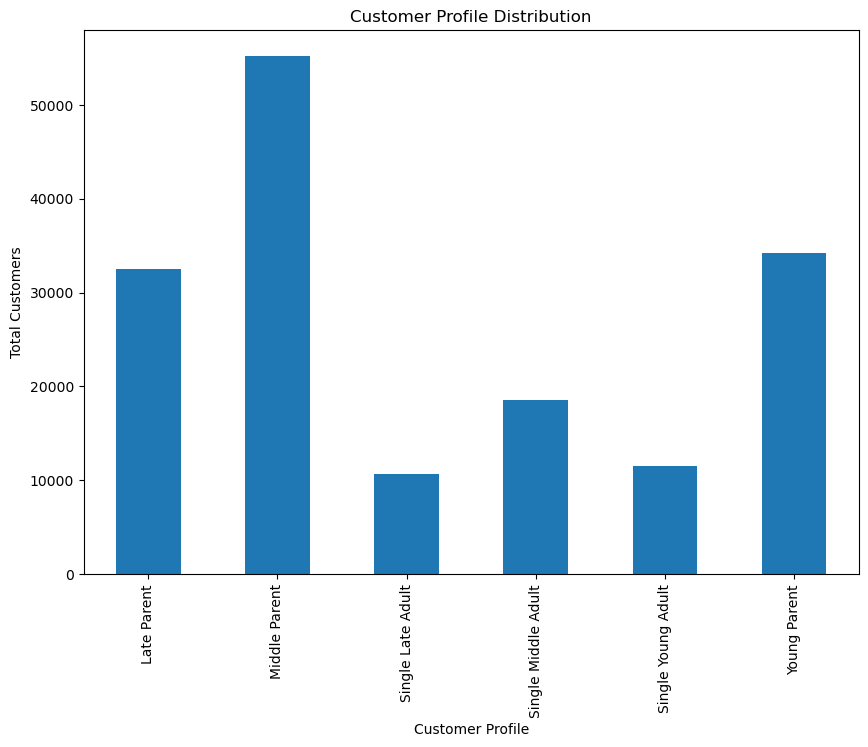

In [105]:
# Visualizing Distribution of Special Profiles
plt.figure(figsize = (10,8))
profile_bar = df_qual['Customer_Profile'].value_counts().sort_index().plot.bar()
plt.xlabel('Customer Profile')
plt.ylabel('Total Customers')
plt.title('Customer Profile Distribution')
plt.subplots_adjust(bottom=.2)
#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_distribution.png'))

In [82]:
#Checking distribution of Gender
df_qual['Gender'].value_counts(dropna = False)

Gender
Male      81998
Female    80633
Name: count, dtype: int64

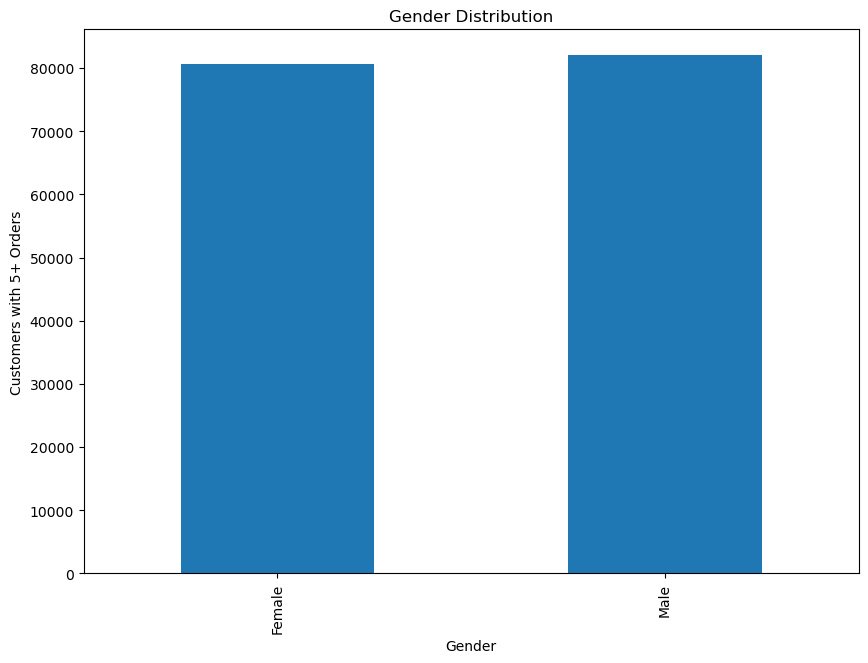

In [106]:
#Visualize Gender Difference
plt.figure(figsize = (10,8))
gender_bar = df_qual['Gender'].value_counts().sort_index().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Customers with 5+ Orders')
plt.title('Gender Distribution')
plt.subplots_adjust(bottom=.2)
#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gender_distribution.png'))

In [84]:
df_qual['Age_Range'].value_counts(dropna = False)

Age_Range
Middle Adult    73692
Young Adult     45689
Late Adult      43250
Name: count, dtype: int64

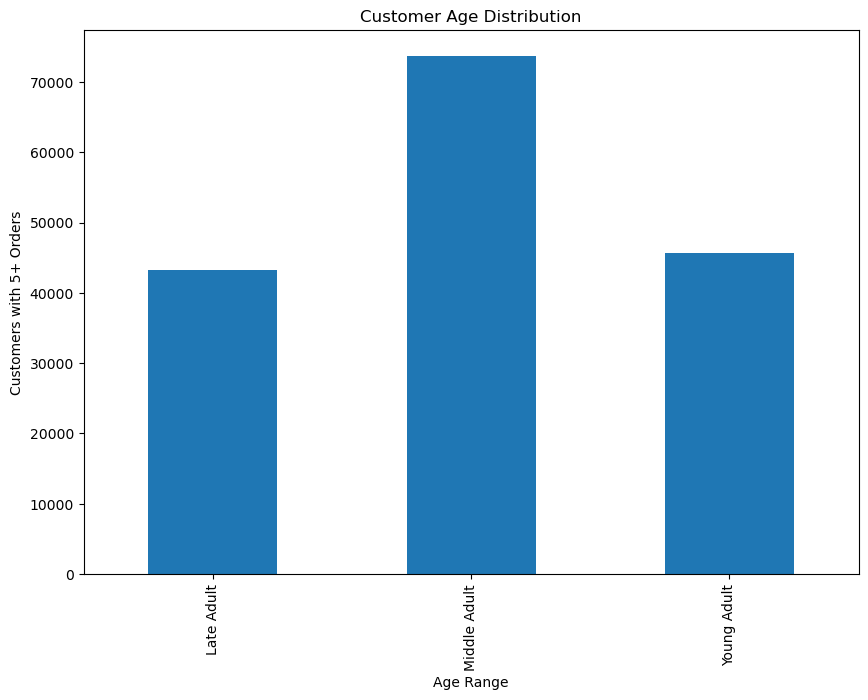

In [107]:
#Visualizing Age Difference
plt.figure(figsize = (10,8))
age_bar = df_qual['Age_Range'].value_counts().sort_index().plot.bar()
plt.xlabel('Age Range')
plt.ylabel('Customers with 5+ Orders')
plt.title('Customer Age Distribution')
plt.subplots_adjust(bottom=.2)

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_age_distribution.png'))

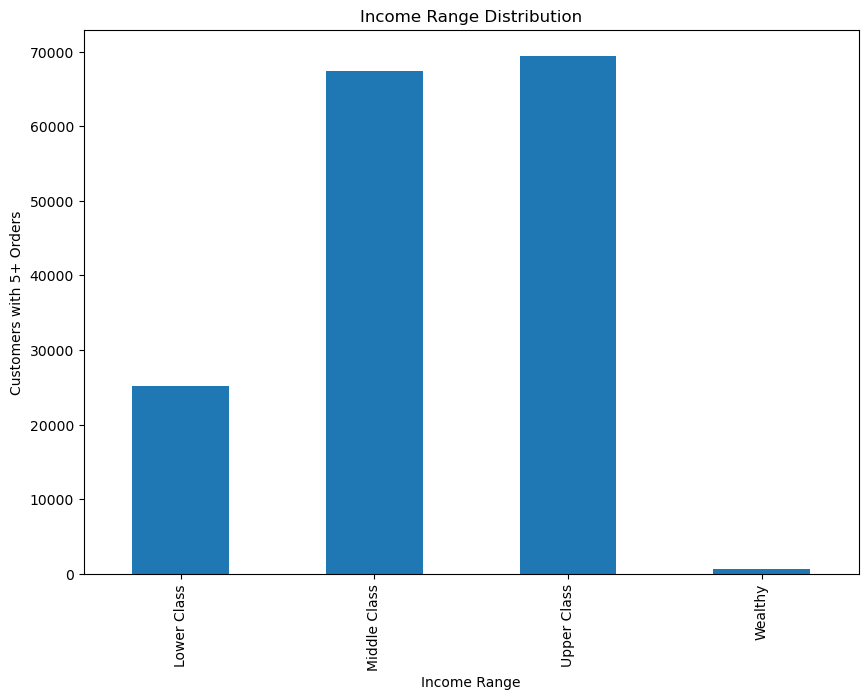

In [108]:
#Visualizing Income Difference
plt.figure(figsize = (10,8))
income_bar = df_qual['Income_Range'].value_counts().sort_index().plot.bar()
plt.xlabel('Income Range')
plt.ylabel('Customers with 5+ Orders')
plt.title('Income Range Distribution')
plt.subplots_adjust(bottom=.2)

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_range_distribution.png'))

In [87]:
df_qual['Shop_Day'].value_counts(dropna = False)

Shop_Day
Weekday Shopper    149292
Weekend Shopper     13339
Name: count, dtype: int64

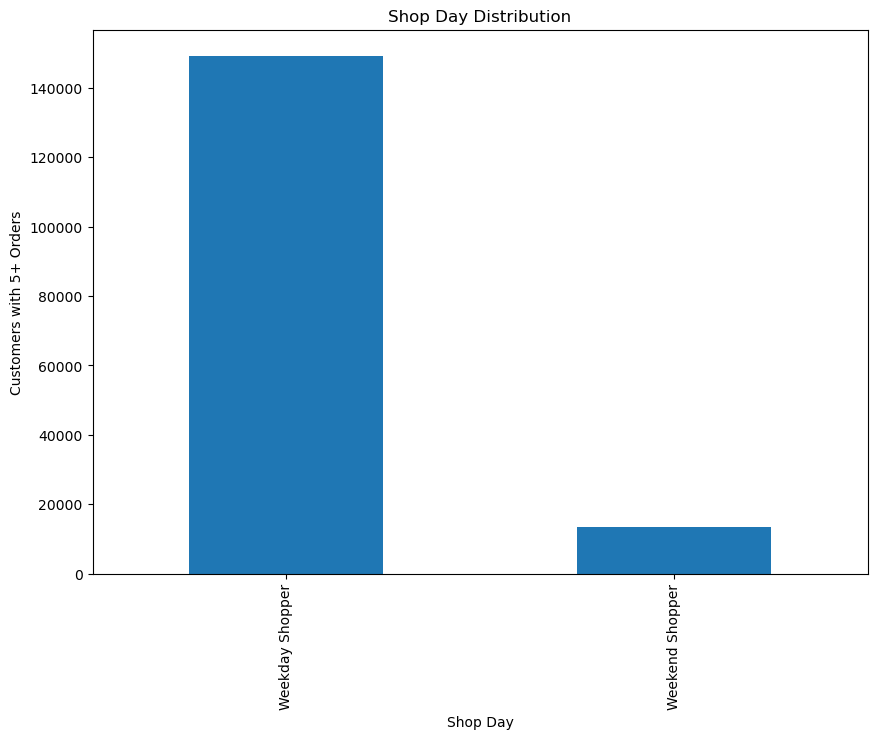

In [109]:
#Visualizing Shop Day Distribution
plt.figure(figsize = (10,8))
income_bar = df_qual['Shop_Day'].value_counts().sort_index().plot.bar()
plt.xlabel('Shop Day')
plt.ylabel('Customers with 5+ Orders')
plt.title('Shop Day Distribution')
plt.subplots_adjust(bottom=.2)

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shop_day_distribution.png'))

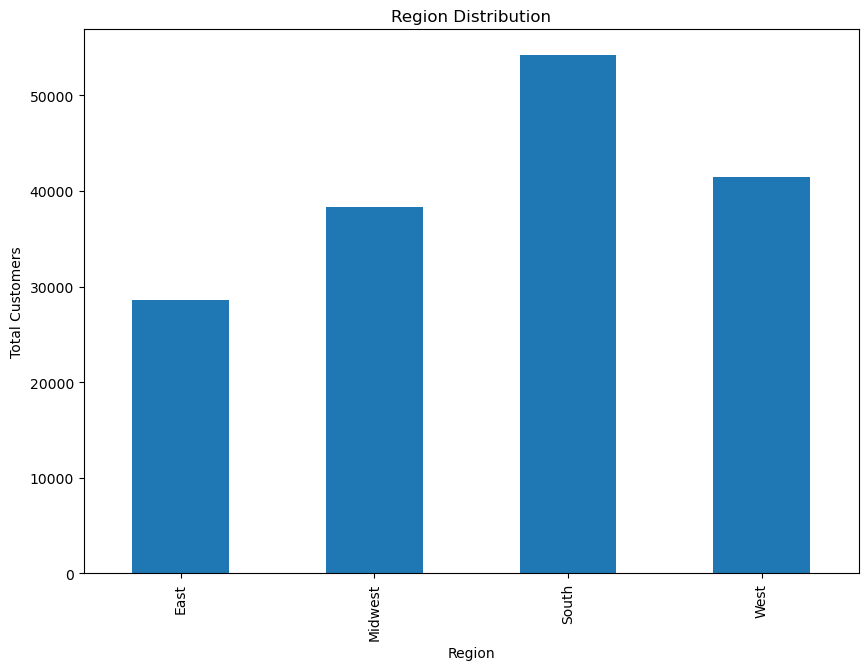

In [110]:
# Visualizing Distribution of Special Profiles
plt.figure(figsize = (10,8))
region_bar = df_qual['Region'].value_counts().sort_index().plot.bar()
plt.xlabel('Region')
plt.ylabel('Total Customers')
plt.title('Region Distribution')
plt.subplots_adjust(bottom=.2)
#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_distribution.png'))

# 09 Aggregating and Analyzing Expenditure and Usage-Frequency for Customers

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

## Expenditure

### Analyzing Customer Profile Expenditure

In [90]:
# Performing Multiple Aggregations to group Customer Profiles by min,max, and avg spent (prices column)
df_5plus_com.groupby('Customer_Profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                          mean  min      max
Customer_Profile                            
Late Parent          11.675617  1.0  99999.0
Middle Parent        11.901780  1.0  99999.0
Single Late Adult    12.008598  1.0  99999.0
Single Middle Adult  12.062228  1.0  99999.0
Single Young Adult   12.255711  1.0  99999.0
Young Parent         12.027423  1.0  99999.0

In [91]:
# Performing Multiple Aggregations to group Income Range by min,max, and avg spent (prices column)
df_5plus_com.groupby('Income_Range').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
Income_Range                          
Lower Class     6.707347  1.0     25.0
Middle Class    8.442726  1.0  99999.0
Upper Class    13.454469  1.0  99999.0
Wealthy       251.104701  1.0  99999.0

In [92]:
# Performing Multiple Aggregations to group Age Range by min,max, and avg spent (prices column)
df_5plus_com.groupby('Age_Range').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
Age_Range                            
Late Adult    11.757768  1.0  99999.0
Middle Adult  11.942264  1.0  99999.0
Young Adult   12.084312  1.0  99999.0

In [93]:
# Performing Multiple Aggregations to group Region by min,max, and avg spent (prices column)
df_5plus_com.groupby('Region').agg({'prices': ['mean', 'min', 'max']})

prices              
              mean  min      max
Region                          
East     11.542582  1.0  99999.0
Midwest  12.681835  1.0  99999.0
South    12.118845  1.0  99999.0
West     11.276491  1.0  99999.0

In [94]:
# Performing Multiple Aggregations to group Gender by min,max, and avg spent (prices column)
df_5plus_com.groupby('Gender').agg({'prices': ['mean', 'min', 'max']})

prices              
             mean  min      max
Gender                         
Female  11.837867  1.0  99999.0
Male    12.027894  1.0  99999.0

In [95]:
# Performing Multiple Aggregations to group Shop Day by min,max, and avg spent (prices column)
df_5plus_com.groupby('Shop_Day').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
Shop_Day                                
Weekday Shopper  11.851839  1.0  99999.0
Weekend Shopper  13.209654  1.0  99999.0

### Expenditure Insights

When it comes to mean, min, max spent for all the different variables (tested above). There are really only a few that stand out.

1. Income Range, there are significant differences when it comes to average spent for income range. As it seems that as income increases, average spent also increases (Visualized in Expenditure Viz)
2. Weekend Shoppers spend more on average compared to weekday shoppers. (This may be skewed due to the smaller amount of orders on weekends vs weekdays)

Otherwise with the remaining variables there are only small deviations for spending

### Expenditure Visualizations

#### Average Spent by Income Range

In [111]:
#Creating Dataframe to group income_range and spending (prices)
avg_spending_range = df_5plus_com.groupby('Income_Range')['prices'].mean().reset_index()

In [112]:
#printing dataframe
avg_spending_range

,Income_Range,prices
0,Lower Class,6.707347
1,Middle Class,8.442726
2,Upper Class,13.454469
3,Wealthy,251.104701


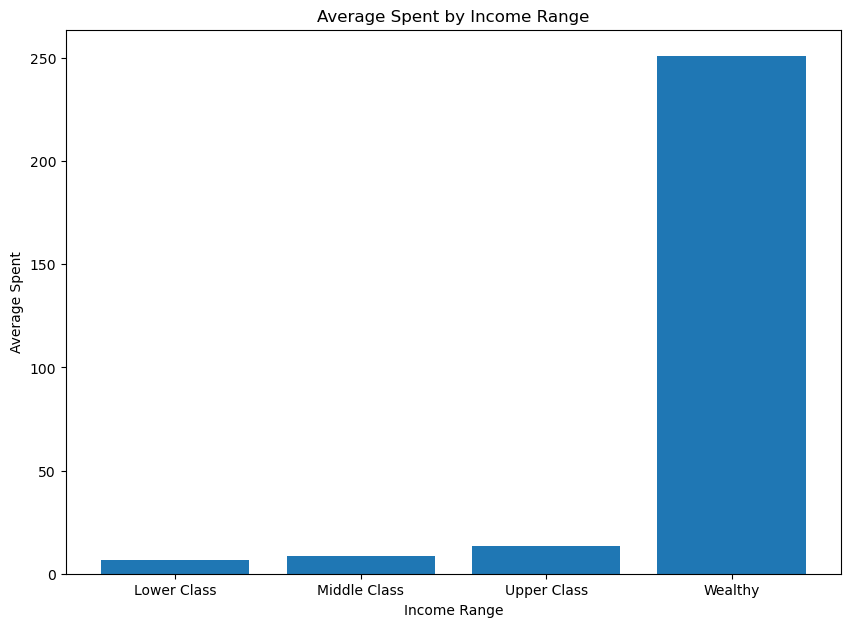

In [113]:
#Plotting a bar chart for the Average Spent by Income Range
plt.figure(figsize= (10,8))
plt.bar(avg_spending_range['Income_Range'],avg_spending_range['prices'])
plt.xlabel('Income Range')
plt.ylabel('Average Spent')
plt.title('Average Spent by Income Range')
plt.subplots_adjust(bottom=.2)

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ir_average_spent.png'))

#### Average Spent by Customer Profile

In [114]:
#Creating Dataframe to group customer profile and spending (prices)
avg_spending_range_cp = df_5plus_com.groupby('Customer_Profile')['prices'].mean().reset_index()

In [115]:
#printing dataframe
avg_spending_range_cp

,Customer_Profile,prices
0,Late Parent,11.675617
1,Middle Parent,11.901780
2,Single Late Adult,12.008598
3,Single Middle Adult,12.062228
4,Single Young Adult,12.255711
5,Young Parent,12.027423


Text(0.5, 1.0, 'Average Spent by Customer Profile')

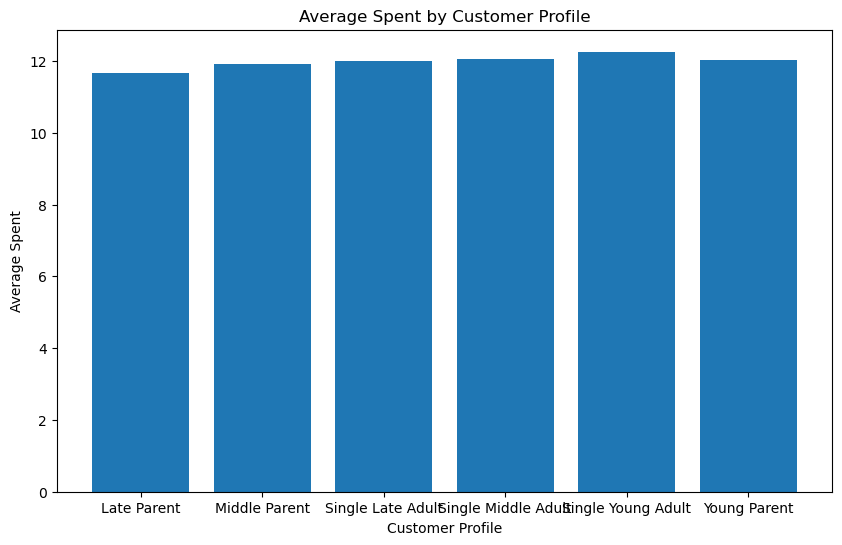

In [118]:
#Plotting a bar chart for the Average Spent by Customer Profile
plt.figure(figsize= (10,6))
plt.bar(avg_spending_range_cp['Customer_Profile'],avg_spending_range_cp['prices'])
plt.xlabel('Customer Profile')
plt.ylabel('Average Spent')
plt.title('Average Spent by Customer Profile')

#### Average Spent by Shop Day

In [119]:
#Creating Dataframe to group Shop Day and spending (prices)
avg_spending_range_sd = df_5plus_com.groupby('Shop_Day')['prices'].mean().reset_index()

In [120]:
#printing dataframe
avg_spending_range_sd

,Shop_Day,prices
0,Weekday Shopper,11.851839
1,Weekend Shopper,13.209654


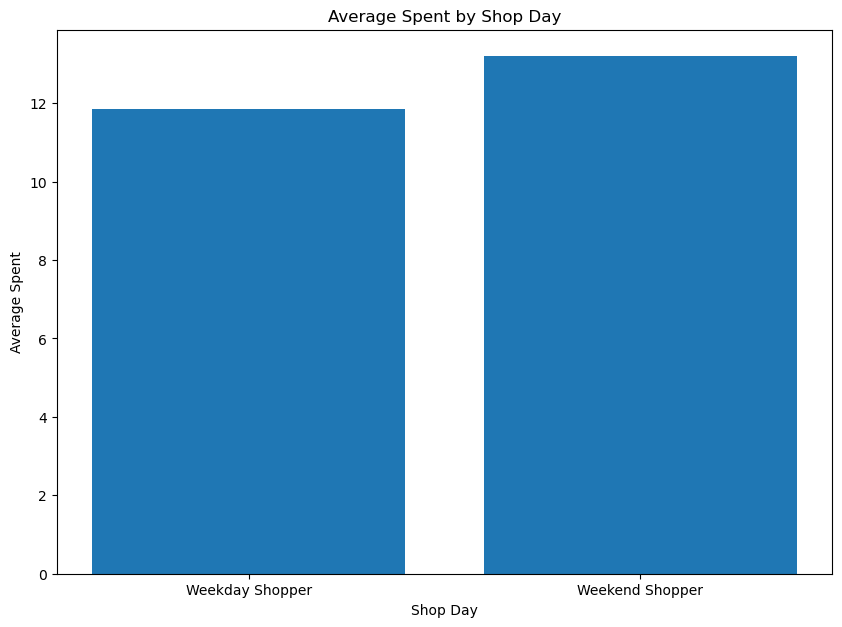

In [121]:
#Plotting a bar chart for the Average Spent by Customer Profile
plt.figure(figsize= (10,8))
plt.bar(avg_spending_range_sd['Shop_Day'],avg_spending_range_sd['prices'])
plt.xlabel('Shop Day')
plt.ylabel('Average Spent')
plt.title('Average Spent by Shop Day')
plt.subplots_adjust(bottom=.2)

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'average_spent_sd.png'))

## Usage-Frequency

### Analyzing Usage-Frequency

In [109]:
# Performing Multiple Aggregations to group Customer Profiles by min,max, and avg orders (max_order column)
df_5plus_com.groupby('Customer_Profile').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                          mean min max
Customer_Profile                      
Late Parent          34.288679   5  99
Middle Parent        34.341389   5  99
Single Late Adult    34.442822   5  99
Single Middle Adult  35.074853   5  99
Single Young Adult   34.243558   5  99
Young Parent         34.394298   5  99

In [110]:
# Performing Multiple Aggregations to group Income_Range by min,max, and avg orders (max_order column)
df_5plus_com.groupby('Income_Range').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                   mean min max
Income_Range                   
Lower Class   32.382129   5  99
Middle Class  34.774966   5  99
Upper Class   34.522657   5  99
Wealthy       39.057949   5  99

In [111]:
# Performing Multiple Aggregations to group Age_Range by min,max, and avg orders (max_order column)
df_5plus_com.groupby('Age_Range').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                   mean min max
Age_Range                      
Late Adult    34.326709   5  99
Middle Adult  34.526453   5  99
Young Adult   34.356734   5  99

In [112]:
# Performing Multiple Aggregations to group Customer Profiles by min,max, and avg orders (max_order column)
df_5plus_com.groupby('Region').agg({'max_order': ['mean', 'min', 'max']})

max_order        
              mean min max
Region                    
East     34.604733   5  99
Midwest  33.930750   5  99
South    34.482436   5  99
West     34.681821   5  99

In [113]:
# Performing Multiple Aggregations to group Gender by min,max, and avg orders (max_order column)
df_5plus_com.groupby('Gender').agg({'max_order': ['mean', 'min', 'max']})

max_order        
             mean min max
Gender                   
Female  34.580885   5  99
Male    34.272571   5  99

In [115]:
# Performing Multiple Aggregations to group Shop Day by min,max, and avg orders (max_order column)
df_5plus_com.groupby('Shop_Day').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                      mean min max
Shop_Day                          
Weekday Shopper  35.038083   5  99
Weekend Shopper  24.858139   5  99

### Usage Frequency Insights

Similar to Expenditure we see the same case when it comes to average number of orders. Income range and Shop Day are the two main points where there are significant deviations. 

### Visualizing Usage Frequency

#### Average Orders by Income Range

In [122]:
#Creating Dataframe to group income_range and average total orders (max_order)
avg_order_range_IR = df_5plus_com.groupby('Income_Range')['max_order'].mean().reset_index()

In [123]:
#printing dataframe
avg_order_range_IR

,Income_Range,max_order
0,Lower Class,32.382129
1,Middle Class,34.774966
2,Upper Class,34.522657
3,Wealthy,39.057949


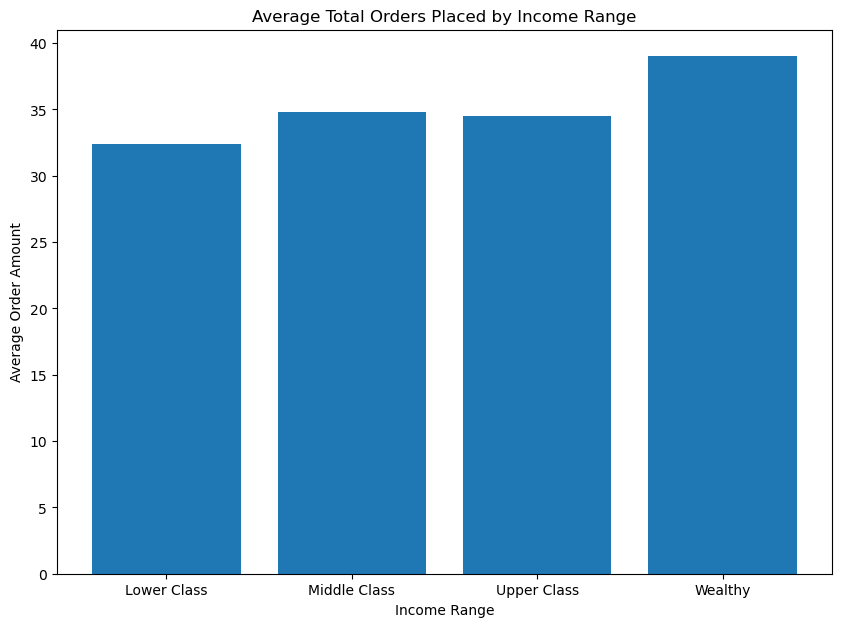

In [124]:
#Plotting a bar chart for the Average Orders by Income Range
plt.figure(figsize= (10,8))
plt.bar(avg_order_range_IR['Income_Range'],avg_order_range_IR['max_order'])
plt.xlabel('Income Range')
plt.ylabel('Average Order Amount')
plt.title('Average Total Orders Placed by Income Range')
plt.subplots_adjust(bottom=.2)

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'IR_average_customer_order.png'))

#### Average Orders by Shop Day

In [126]:
#Creating Dataframe to group income_range and average total orders (max_order)
avg_order_range_SD = df_5plus_com.groupby('Shop_Day')['max_order'].mean().reset_index()

In [127]:
#printing dataframe
avg_order_range_SD

,Shop_Day,max_order
0,Weekday Shopper,35.038083
1,Weekend Shopper,24.858139


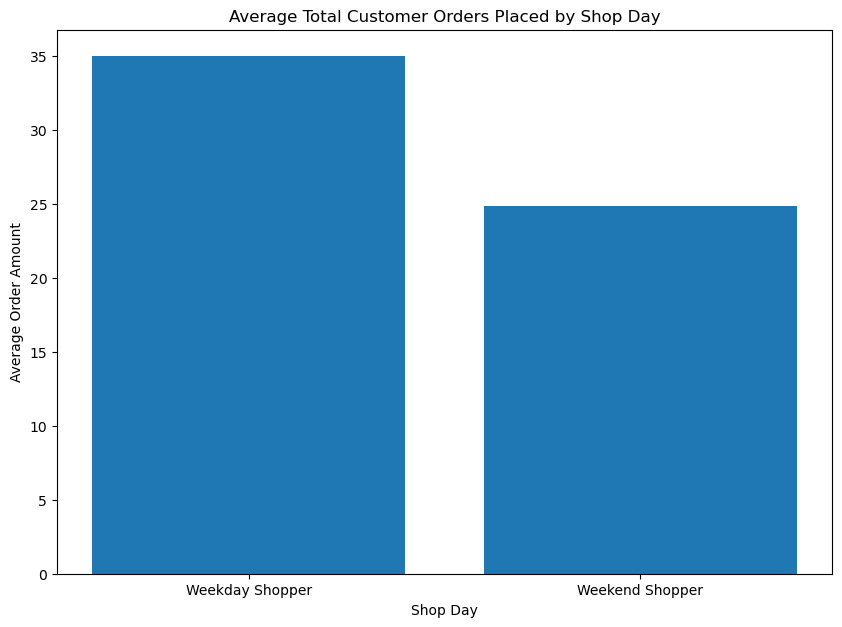

In [128]:
#Plotting a bar chart for the Average Orders by Shop Day
plt.figure(figsize= (10,8))
plt.bar(avg_order_range_SD['Shop_Day'],avg_order_range_SD['max_order'])
plt.xlabel('Shop Day')
plt.ylabel('Average Order Amount')
plt.title('Average Total Customer Orders Placed by Shop Day')
plt.subplots_adjust(bottom=.2)

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'average_customer_order_sd.png'))

#### Average Orders by Customer Profile

In [121]:
#Creating Dataframe to group Customer Profile and average total orders (max_order)
avg_order_range_CP = df_5plus_com.groupby('Customer_Profile')['max_order'].mean().reset_index()

In [122]:
#printing dataframe 
avg_order_range_CP

,Customer_Profile,max_order
0,Late Parent,34.288679
1,Middle Parent,34.341389
2,Single Late Adult,34.442822
3,Single Middle Adult,35.074853
4,Single Young Adult,34.243558
5,Young Parent,34.394298


Text(0.5, 1.0, 'Average Total Orders Placed by Customer Profile')

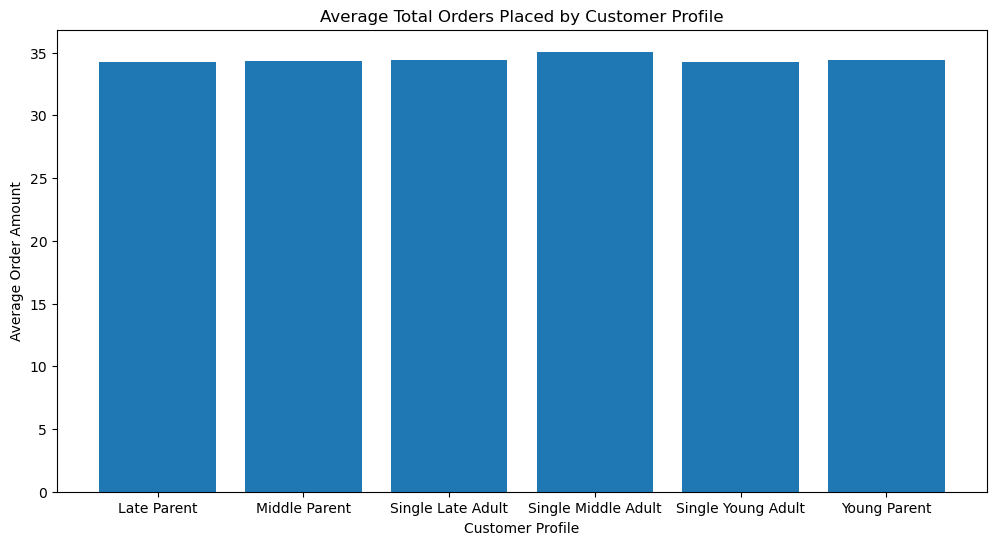

In [123]:
#Plotting a bar chart for the Average Orders by Income Range
plt.figure(figsize= (12,6))
plt.bar(avg_order_range_CP['Customer_Profile'],avg_order_range_CP['max_order'])
plt.xlabel('Customer Profile')
plt.ylabel('Average Order Amount')
plt.title('Average Total Orders Placed by Customer Profile')

# 10 Region and Department Analysis

## Region Analysis

### Income Range Distribution by Region

In [124]:
df_region_profile = df_qual.groupby('Income_Range').Region

In [125]:
df_region_profile.value_counts(dropna = False)

Income_Range  Region 
Lower Class   South       8403
              West        6458
              Midwest     5891
              East        4440
Middle Class  South      22634
              West       17224
              Midwest    15729
              East       11772
Upper Class   South      22940
              West       17641
              Midwest    16605
              East       12263
Wealthy       South        216
              West         158
              Midwest      151
              East         106
Name: count, dtype: int64

In [218]:
#Creating Dataframe for only lower class customers grouped by region
lower_class_region = df_qual[df_qual['Income_Range'] == 'Lower Class'].groupby('Region').size()

In [219]:
#Creating Dataframe for only middle class customers grouped by region
middle_class_region = df_qual[df_qual['Income_Range'] == 'Middle Class'].groupby('Region').size()

In [220]:
#Creating Dataframe for only upper class customers grouped by region
upper_class_region = df_qual[df_qual['Income_Range'] == 'Upper Class'].groupby('Region').size()

In [221]:
#Creating Dataframe for only wealthy customers grouped by region
wealthy_class_region = df_qual[df_qual['Income_Range'] == 'Wealthy'].groupby('Region').size()

In [222]:
#Testing new dataframes for accuracy
upper_class_region

Region
East       12263
Midwest    16605
South      22940
West       17641
dtype: int64

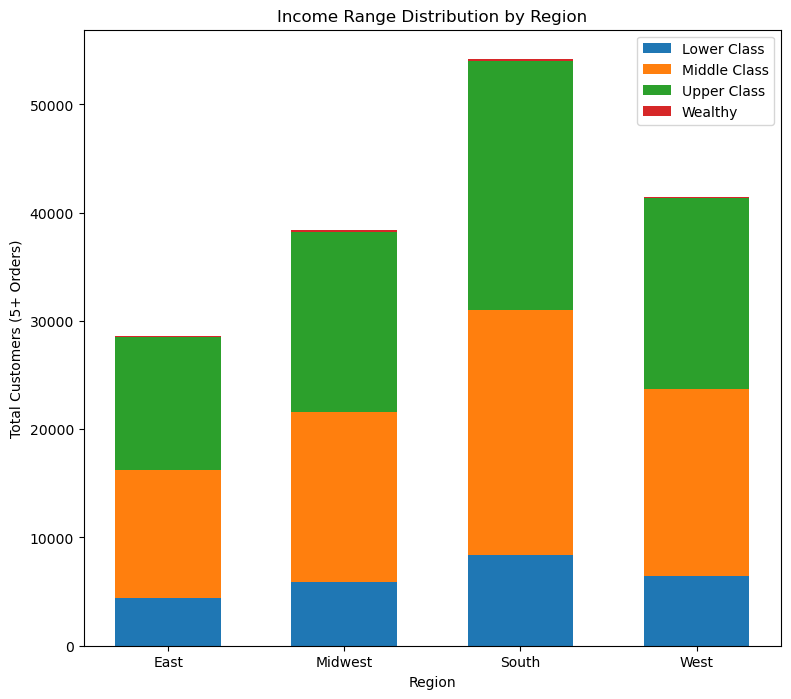

In [223]:
# Visualizing Distribution of Special Profiles
plt.figure(figsize = (9,8))
plt.bar(lower_class_region.index, lower_class_region.values, 0.6, label = "Lower Class")
plt.bar(middle_class_region.index, middle_class_region.values, 0.6, bottom = lower_class_region.values, label = "Middle Class")
plt.bar(upper_class_region.index, upper_class_region.values, 0.6, bottom = (lower_class_region.values + middle_class_region.values), label = "Upper Class")
plt.bar(wealthy_class_region.index, wealthy_class_region.values, 0.6, bottom = (lower_class_region.values + middle_class_region.values + upper_class_region.values), label = "Wealthy")
plt.xlabel('Region')
plt.ylabel('Total Customers (5+ Orders)')
plt.title('Income Range Distribution by Region')
plt.legend()

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_range_region.png'))

### Age Range Distribution by Region

In [211]:
df_age_profile = df_qual.groupby('Age_Range').Region

In [212]:
df_age_profile.value_counts(dropna = False)

Age_Range     Region 
Late Adult    South      14433
              West       11068
              Midwest    10169
              East        7580
Middle Adult  South      24410
              West       18684
              Midwest    17577
              East       13021
Young Adult   South      15350
              West       11729
              Midwest    10630
              East        7980
Name: count, dtype: int64

In [213]:
#Creating Dataframe for only Young Adult customers grouped by region
young_adult_region = df_qual[df_qual['Age_Range'] == 'Young Adult'].groupby('Region').size()

In [214]:
#Creating Dataframe for only Middle Adult customers grouped by region
middle_adult_region = df_qual[df_qual['Age_Range'] == 'Middle Adult'].groupby('Region').size()

In [215]:
#Creating Dataframe for only Young Adult customers grouped by region
late_adult_region = df_qual[df_qual['Age_Range'] == 'Late Adult'].groupby('Region').size()

In [216]:
#Testing new dataframes for accuracy
late_adult_region

Region
East        7580
Midwest    10169
South      14433
West       11068
dtype: int64

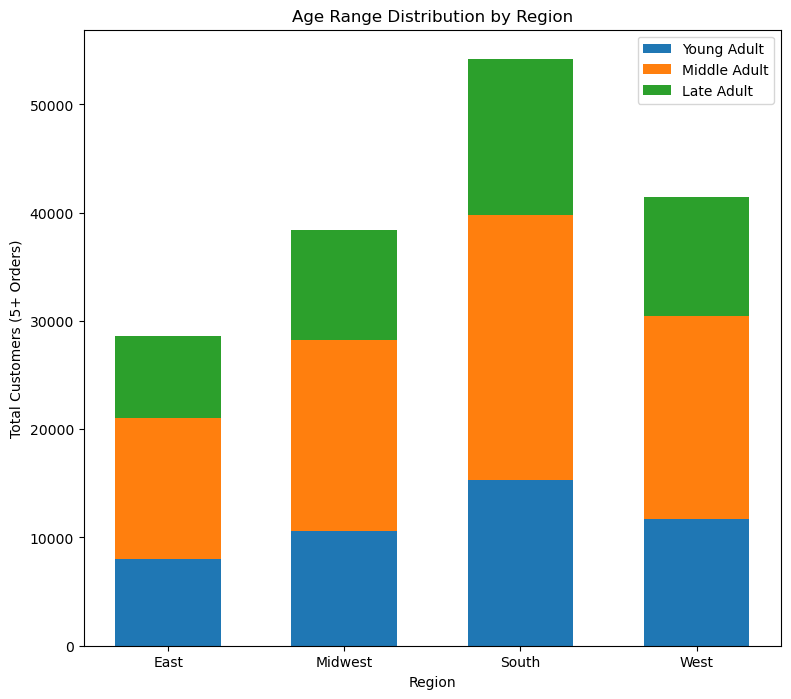

In [217]:
# Visualizing Distribution of Special Profiles
plt.figure(figsize = (9,8))
plt.bar(young_adult_region.index, young_adult_region.values, 0.6, label = "Young Adult")
plt.bar(middle_adult_region.index, middle_adult_region.values, 0.6, bottom = young_adult_region.values, label = "Middle Adult")
plt.bar(late_adult_region.index, late_adult_region.values, 0.6, bottom = (young_adult_region.values + middle_adult_region.values), label = "Late Adult")
plt.xlabel('Region')
plt.ylabel('Total Customers (5+ Orders)')
plt.title('Age Range Distribution by Region')
plt.legend()

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_range_region.png'))

### Customer Profile Region Distribution

In [139]:
df_customer_profile = df_qual.groupby('Customer_Profile').Region

In [140]:
df_customer_profile.value_counts(dropna = False)

Customer_Profile     Region 
Late Parent          South      10865
                     West        8339
                     Midwest     7703
                     East        5640
Middle Parent        South      18348
                     West       13943
                     Midwest    13097
                     East        9808
Single Late Adult    South       3568
                     West        2729
                     Midwest     2466
                     East        1940
Single Middle Adult  South       6062
                     West        4741
                     Midwest     4480
                     East        3213
Single Young Adult   South       3907
                     West        2899
                     Midwest     2620
                     East        2102
Young Parent         South      11443
                     West        8830
                     Midwest     8010
                     East        5878
Name: count, dtype: int64

### Shop Day Region Distribution

In [141]:
df_shopday_profile = df_qual.groupby('Shop_Day').Region

In [142]:
df_shopday_profile.value_counts(dropna = False)

Shop_Day         Region 
Weekday Shopper  South      49727
                 West       38060
                 Midwest    35266
                 East       26239
Weekend Shopper  South       4466
                 West        3421
                 Midwest     3110
                 East        2342
Name: count, dtype: int64

## Department Analysis

### Top 5 Departments for each Region

#### Creating Dataframes

In [200]:
#Creating Dataframe for South Orders grouped by department id
south_departments = df_5plus_com[df_5plus_com['Region'] == 'South'].groupby('department').size().sort_values(ascending = False)

In [201]:
#Creating Dataframe for West Orders grouped by department id
west_departments = df_5plus_com[df_5plus_com['Region'] == 'West'].groupby('department').size().sort_values(ascending = False)

In [202]:
#Creating Dataframe for Midwest Orders grouped by department id
midwest_departments = df_5plus_com[df_5plus_com['Region'] == 'Midwest'].groupby('department').size().sort_values(ascending = False)

In [203]:
#Creating Dataframe for East Orders grouped by department id
east_departments = df_5plus_com[df_5plus_com['Region'] == 'East'].groupby('department').size().sort_values(ascending = False)

In [204]:
# Viewing all Departments
west_departments

department
produce            2324678
dairy eggs         1327060
snacks              711329
beverages           650574
frozen              543164
pantry              457886
bakery              288155
canned goods        260221
deli                257352
dry goods pasta     212043
household           178200
meat seafood        173830
breakfast           173619
personal care       106647
babies              102428
international        65998
alcohol              36754
pets                 24059
missing              15906
bulk                  8743
other                 8581
dtype: int64

In [205]:
# Creating separate dataframe that only shows the top 5 departments
top_5_south_departments = south_departments.head(5)

In [206]:
# Creating separate dataframe that only shows the top 5 departments
top_5_west_departments = west_departments.head(5)

In [207]:
# Creating separate dataframe that only shows the top 5 departments
top_5_midwest_departments = midwest_departments.head(5)

In [208]:
# Creating separate dataframe that only shows the top 5 departments
top_5_east_departments = east_departments.head(5)

In [209]:
#Viewing top 5 departments for each region
top_5_south_departments

department
produce       3027476
dairy eggs    1723016
snacks         916780
beverages      859419
frozen         709906
dtype: int64

#### Creating Charts

Text(0.5, 1.0, 'Top 5 Departments for South Region')

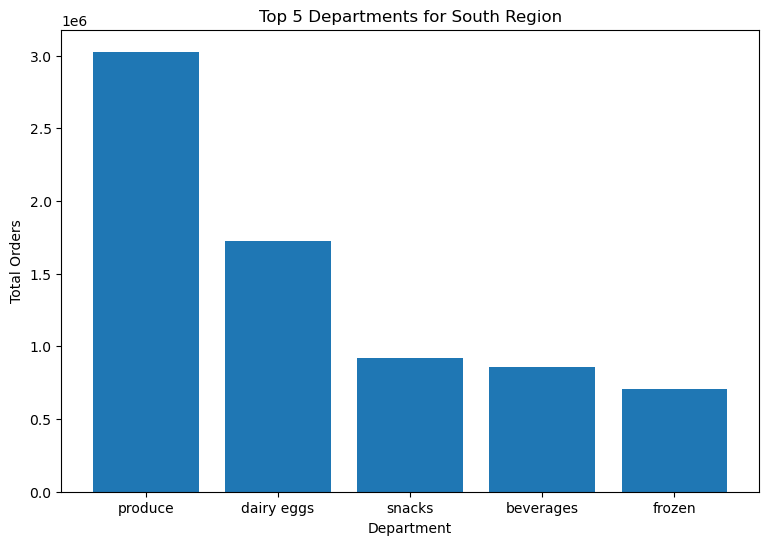

In [224]:
#Plotting a bar chart for the Top 5 Departments for South Region
plt.figure(figsize= (9,6))
plt.bar(top_5_south_departments.index,top_5_south_departments.values)
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.title('Top 5 Departments for South Region')

Text(0.5, 1.0, 'Top 5 Departments for West Region')

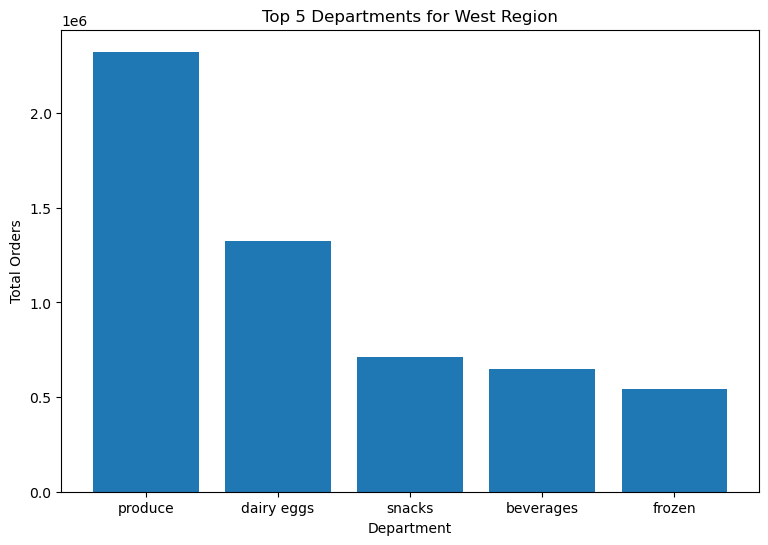

In [225]:
#Plotting a bar chart for the Top 5 Departments for West Region
plt.figure(figsize= (9,6))
plt.bar(top_5_west_departments.index,top_5_west_departments.values)
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.title('Top 5 Departments for West Region')

Text(0.5, 1.0, 'Top 5 Departments for Midwest Region')

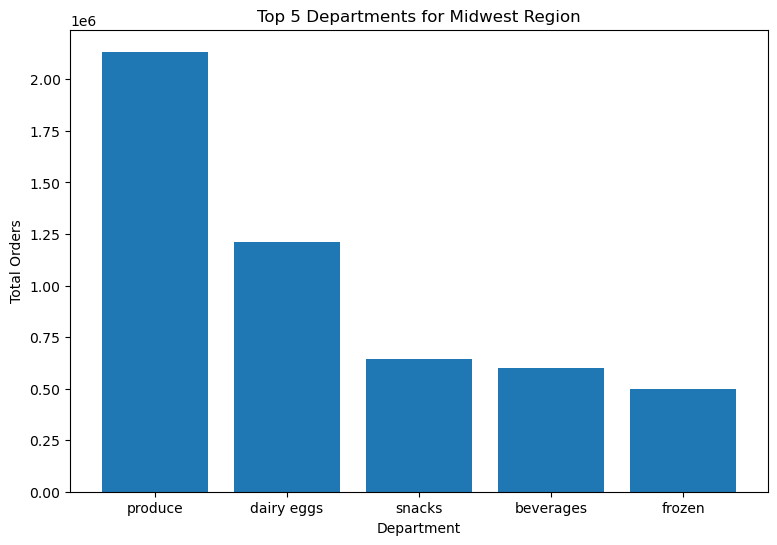

In [226]:
#Plotting a bar chart for the Top 5 Departments for Midwest Region
plt.figure(figsize= (9,6))
plt.bar(top_5_midwest_departments.index,top_5_midwest_departments.values)
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.title('Top 5 Departments for Midwest Region')

Text(0.5, 1.0, 'Top 5 Departments for East Region')

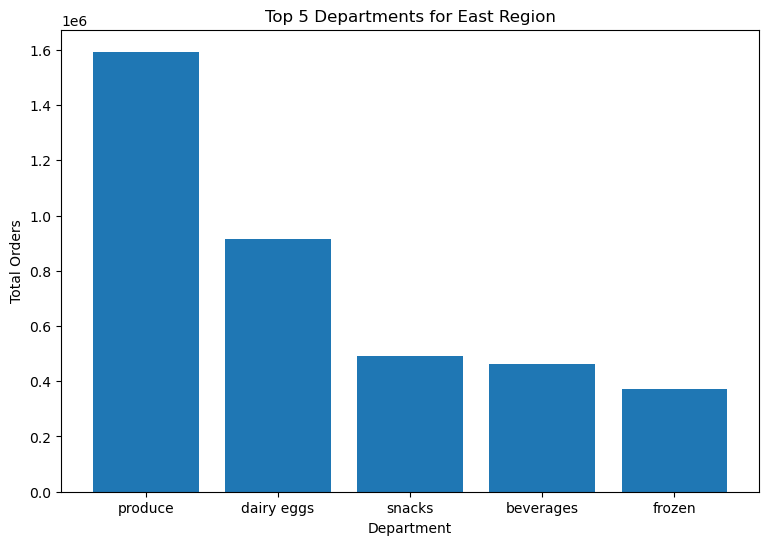

In [227]:
#Plotting a bar chart for the Top 5 Departments for East Region
plt.figure(figsize= (9,6))
plt.bar(top_5_east_departments.index,top_5_east_departments.values)
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.title('Top 5 Departments for East Region')

### Top 5 Departments for each Income Range

#### Creating Dataframes 

In [136]:
#Creating Dataframe for Lower Class Orders grouped by department id
lower_class_departments = df_5plus_com[df_5plus_com['Income_Range'] == 'Lower Class'].groupby('department').size().sort_values(ascending = False)

In [137]:
#Creating Dataframe for Middle Class Orders grouped by department id
middle_class_departments = df_5plus_com[df_5plus_com['Income_Range'] == 'Middle Class'].groupby('department').size().sort_values(ascending = False)

In [138]:
#Creating Dataframe for Lower Class Orders grouped by department id
upper_class_departments = df_5plus_com[df_5plus_com['Income_Range'] == 'Upper Class'].groupby('department').size().sort_values(ascending = False)

In [139]:
#Creating Dataframe for Lower Class Orders grouped by department id
wealthy_class_departments = df_5plus_com[df_5plus_com['Income_Range'] == 'Wealthy'].groupby('department').size().sort_values(ascending = False)

In [206]:
# Viewing Dataframes
lower_class_departments

department
produce            826314
snacks             559529
dairy eggs         502363
beverages          383121
frozen             215177
pantry             166061
bakery             106757
deli               106448
breakfast           91408
household           87216
canned goods        78975
dry goods pasta     64481
personal care       47782
meat seafood        34278
babies              29240
international       21636
alcohol             18047
pets                 8612
missing              6547
bulk                 4676
other                3886
dtype: int64

#### Creating Charts

Text(0.5, 1.0, 'Top 5 Departments for Lower Class Income')

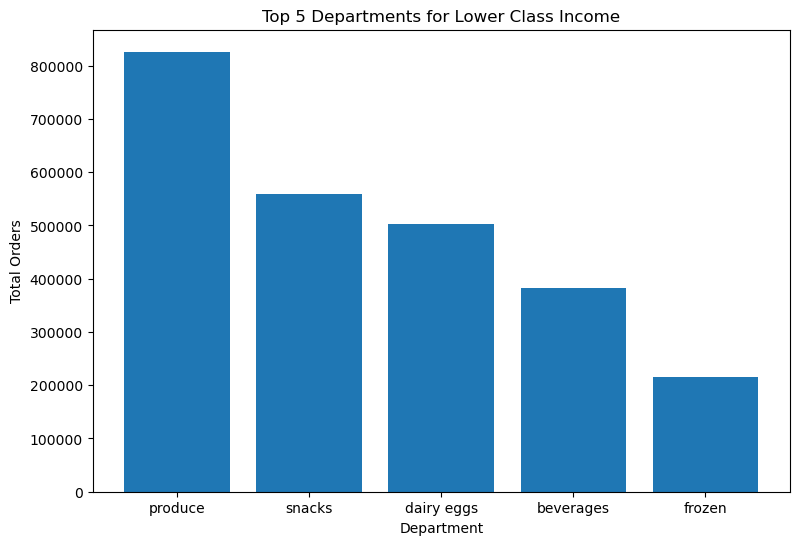

In [230]:
#Plotting a bar chart for the Top 5 Departments for Lower Class
plt.figure(figsize= (9,6))
plt.bar(lower_class_departments.head(5).index,lower_class_departments.head(5).values)
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.title('Top 5 Departments for Lower Class Income')

Text(0.5, 1.0, 'Top 5 Departments for Middle Class Income')

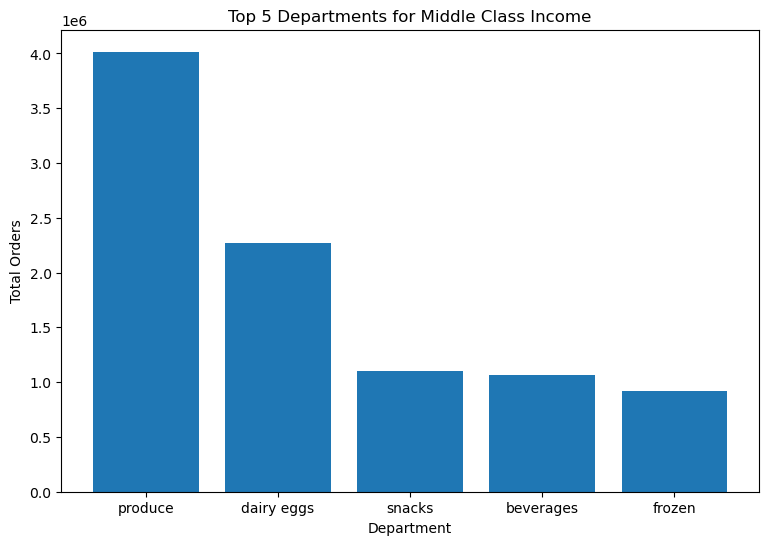

In [231]:
#Plotting a bar chart for the Top 5 Departments for Middle Class
plt.figure(figsize= (9,6))
plt.bar(middle_class_departments.head(5).index,middle_class_departments.head(5).values)
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.title('Top 5 Departments for Middle Class Income')

Text(0.5, 1.0, 'Top 5 Departments for Upper Class Income')

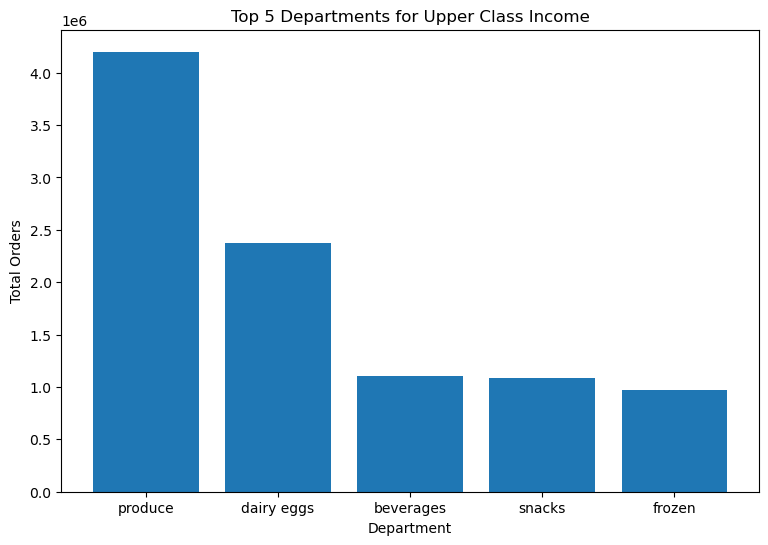

In [232]:
#Plotting a bar chart for the Top 5 Departments for Upper Class
plt.figure(figsize= (9,6))
plt.bar(upper_class_departments.head(5).index,upper_class_departments.head(5).values)
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.title('Top 5 Departments for Upper Class Income')

Text(0.5, 1.0, 'Top 5 Departments for Wealthy Class Income')

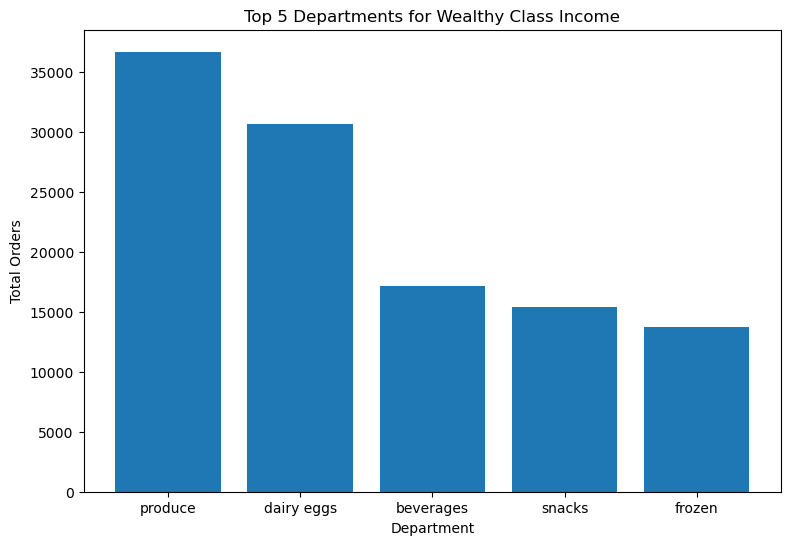

In [241]:
#Plotting a bar chart for the Top 5 Departments for Wealthy Class
plt.figure(figsize= (9,6))
plt.bar(wealthy_class_departments.head(5).index,wealthy_class_departments.head(5).values)
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.title('Top 5 Departments for Wealthy Class Income')

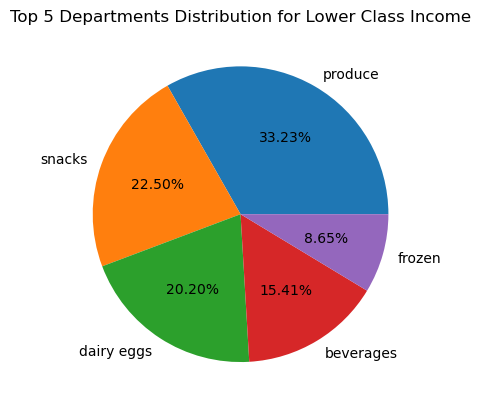

In [199]:
# Creating a Pie chart that shows the distribution of the top 5 departments for Lower Class
fig, ax = plt.subplots()
ax.pie(lower_class_departments.head(5).values, labels = lower_class_departments.head(5).index, autopct = "%1.2f%%")
plt.title('Top 5 Departments Distribution for Lower Class Income')

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lower_class_top5_departments.png'))

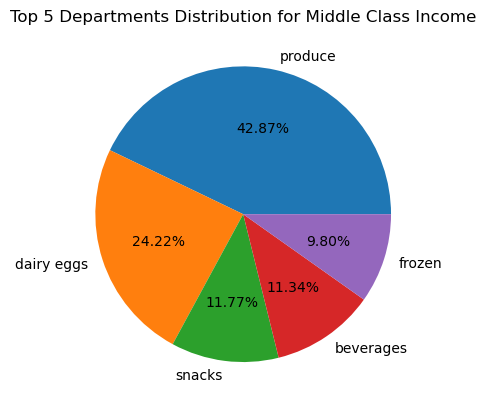

In [198]:
# Creating a Pie chart that shows the distribution of the top 5 departments for Middle Class
fig, ax = plt.subplots()
ax.pie(middle_class_departments.head(5).values, labels = middle_class_departments.head(5).index, autopct = "%1.2f%%")
plt.title('Top 5 Departments Distribution for Middle Class Income')

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'middle_class_top5_departments.png'))

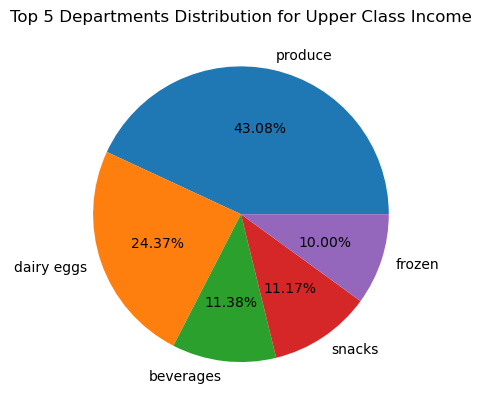

In [197]:
# Creating a Pie chart that shows the distribution of the top 5 departments for Upper Class
fig, ax = plt.subplots()
ax.pie(upper_class_departments.head(5).values, labels = upper_class_departments.head(5).index, autopct = "%1.2f%%")
plt.title('Top 5 Departments Distribution for Upper Class Income')

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'upper_class_top5_departments.png'))

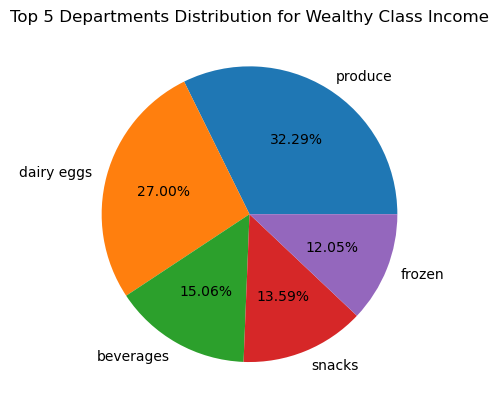

In [195]:
# Creating a Pie chart that shows the distribution of the top 5 departments for Wealthy Class
fig, ax = plt.subplots()
ax.pie(wealthy_class_departments.head(5).values, labels = wealthy_class_departments.head(5).index, autopct = "%1.2f%%")
plt.title('Top 5 Departments Distribution for Wealthy Class Income')

#Exporting Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'wealthy_class_top5_departments.png'))

### Top 5 Departments for each Age Range

#### Creating Dataframes

In [237]:
#Creating Dataframe for Young Adult Orders grouped by department id
young_adult_departments = df_5plus_com[df_5plus_com['Age_Range'] == 'Young Adult'].groupby('department').size().sort_values(ascending = False)

In [239]:
#Creating Dataframe for Middle Adult Orders grouped by department id
middle_adult_departments = df_5plus_com[df_5plus_com['Age_Range'] == 'Middle Adult'].groupby('department').size().sort_values(ascending = False)

In [238]:
#Creating Dataframe for Late Adult Orders grouped by department id
late_adult_departments = df_5plus_com[df_5plus_com['Age_Range'] == 'Late Adult'].groupby('department').size().sort_values(ascending = False)

In [261]:
young_adult_departments

department
produce            2555394
dairy eggs         1471526
snacks              784988
beverages           717390
frozen              597037
pantry              502847
bakery              317031
canned goods        287179
deli                283863
dry goods pasta     232581
household           195953
breakfast           191417
meat seafood        189392
personal care       118700
babies              113465
international        72913
alcohol              42385
pets                 26428
missing              18746
other                 9946
bulk                  9624
dtype: int64

No noteable differences between Age group

### Top 5 Departments for each Customer Profile

#### Creating Dataframes

In [145]:
#Creating Dataframe for Late Parent Orders grouped by department id
late_parent_departments = df_5plus_com[df_5plus_com['Customer_Profile'] == 'Late Parent'].groupby('department').size().sort_values(ascending = False)

In [133]:
#Creating Dataframe for Middle Parent Orders grouped by department id
middle_parent_departments = df_5plus_com[df_5plus_com['Customer_Profile'] == 'Middle Parent'].groupby('department').size().sort_values(ascending = False)

In [112]:
#Creating Dataframe for Young Parent Orders grouped by department id
young_parent_departments = df_5plus_com[df_5plus_com['Customer_Profile'] == 'Young Parent'].groupby('department').size().sort_values(ascending = False)

In [118]:
#Creating Dataframe for Single Late Adult Orders grouped by department id
single_late_departments = df_5plus_com[df_5plus_com['Customer_Profile'] == 'Single Late Adult'].groupby('department').size().sort_values(ascending = False)

In [119]:
#Creating Dataframe for Single Middle Adult Orders grouped by department id
single_middle_departments = df_5plus_com[df_5plus_com['Customer_Profile'] == 'Single Middle Adult'].groupby('department').size().sort_values(ascending = False)

In [120]:
#Creating Dataframe for Single Young Adult Orders grouped by department id
single_young_departments = df_5plus_com[df_5plus_com['Customer_Profile'] == 'Single Young Adult'].groupby('department').size().sort_values(ascending = False)

In [146]:
late_parent_departments

department
produce            1813012
dairy eggs         1029272
snacks              548253
beverages           515378
frozen              423146
pantry              356648
bakery              223579
canned goods        202766
deli                199831
dry goods pasta     164020
household           141616
meat seafood        136819
breakfast           132810
personal care        82961
babies               80312
international        50686
alcohol              27554
pets                 18349
missing              12932
bulk                  6851
other                 6791
dtype: int64

In [130]:
single_late_departments

department
produce            595092
dairy eggs         338800
snacks             180296
beverages          168642
frozen             141104
pantry             115735
bakery              72418
deli                65368
canned goods        64743
dry goods pasta     53296
household           45014
meat seafood        44331
breakfast           42486
personal care       28091
babies              25892
international       16513
alcohol              9139
pets                 6766
missing              3983
other                2155
bulk                 2094
dtype: int64

#### Visualizing Data

##### Parents

Text(0.5, 1.0, 'Top 5 Departments Distribution for Late Parents')

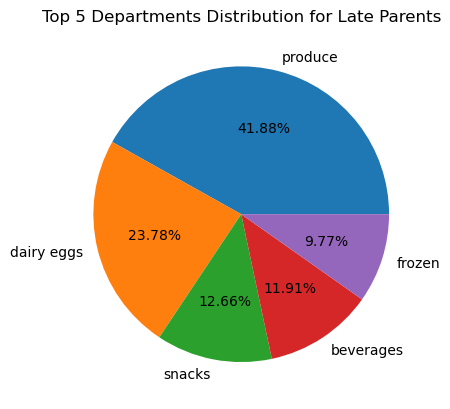

In [157]:
# Creating a Pie chart that shows the distribution of the top 5 departments for Late Parents
fig, ax = plt.subplots()
ax.pie(late_parent_departments.head(5).values, labels = late_parent_departments.head(5).index, autopct = "%1.2f%%")
plt.title('Top 5 Departments Distribution for Late Parents')

Text(0.5, 1.0, 'Top 5 Departments Distribution for Middle Parents')

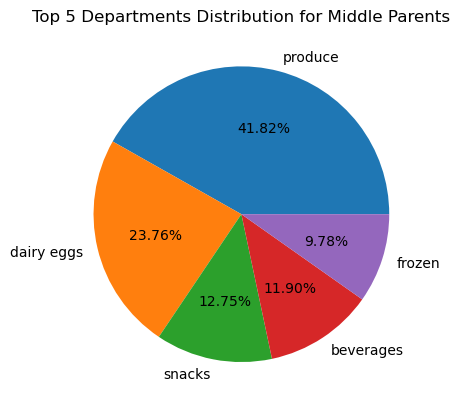

In [156]:
# Creating a Pie chart that shows the distribution of the top 5 departments for Middle Parents
fig, ax = plt.subplots()
ax.pie(middle_parent_departments.head(5).values, labels = middle_parent_departments.head(5).index, autopct = "%1.2f%%")
plt.title('Top 5 Departments Distribution for Middle Parents')

Text(0.5, 1.0, 'Top 5 Departments Distribution for Young Parents')

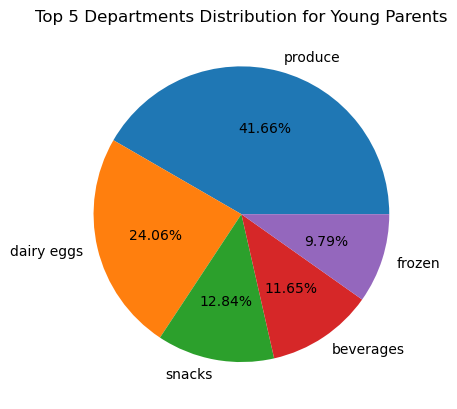

In [155]:
# Creating a Pie chart that shows the distribution of the top 5 departments for Young Parents
fig, ax = plt.subplots()
ax.pie(young_parent_departments.head(5).values, labels = young_parent_departments.head(5).index, autopct = "%1.2f%%")
plt.title('Top 5 Departments Distribution for Young Parents')

##### Single Adults

Text(0.5, 1.0, 'Top 5 Departments Distribution for Single Late Adults')

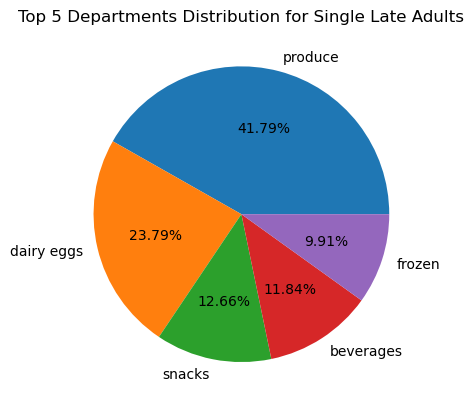

In [154]:
# Creating a Pie chart that shows the distribution of the top 5 departments for Single Late Adults
fig, ax = plt.subplots()
ax.pie(single_late_departments.head(5).values, labels = single_late_departments.head(5).index, autopct = "%1.2f%%")
plt.title('Top 5 Departments Distribution for Single Late Adults')

Text(0.5, 1.0, 'Top 5 Departments Distribution for Single Middle Adults')

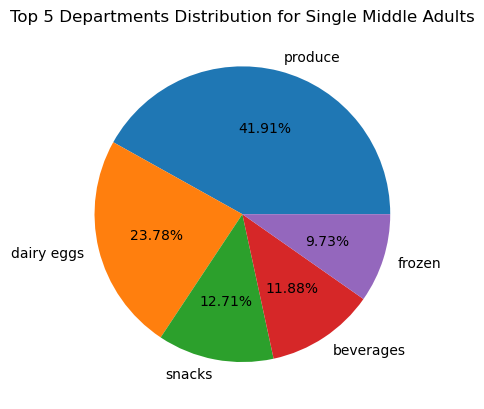

In [153]:
# Creating a Pie chart that shows the distribution of the top 5 departments for Single Middle Adults
fig, ax = plt.subplots()
ax.pie(single_middle_departments.head(5).values, labels = single_middle_departments.head(5).index, autopct = "%1.2f%%")
plt.title('Top 5 Departments Distribution for Single Middle Adults')

There are practically zero differences in distribution for the top 5 categories across each Customer Profile and even beyond 

### Top Departments based on Shop Day

#### Creating Dataframes

In [163]:
#Creating Dataframe for Weekday Shopper grouped by department id
weekday_shopper_departments = df_5plus_com[df_5plus_com['Shop_Day'] == 'Weekday Shopper'].groupby('department').size().sort_values(ascending = False)

In [164]:
#Creating Dataframe for Weekday Shopper grouped by department id
weekend_shopper_departments = df_5plus_com[df_5plus_com['Shop_Day'] == 'Weekend Shopper'].groupby('department').size().sort_values(ascending = False)

In [169]:
weekend_shopper_departments

department
produce            528787
dairy eggs         307474
snacks             161549
beverages          152253
frozen             138464
pantry             112688
canned goods        69081
bakery              66410
deli                59267
dry goods pasta     50764
household           46057
meat seafood        42191
breakfast           40598
personal care       26227
babies              18182
international       15347
alcohol             11503
pets                 6805
missing              4525
other                2316
bulk                 2250
dtype: int64

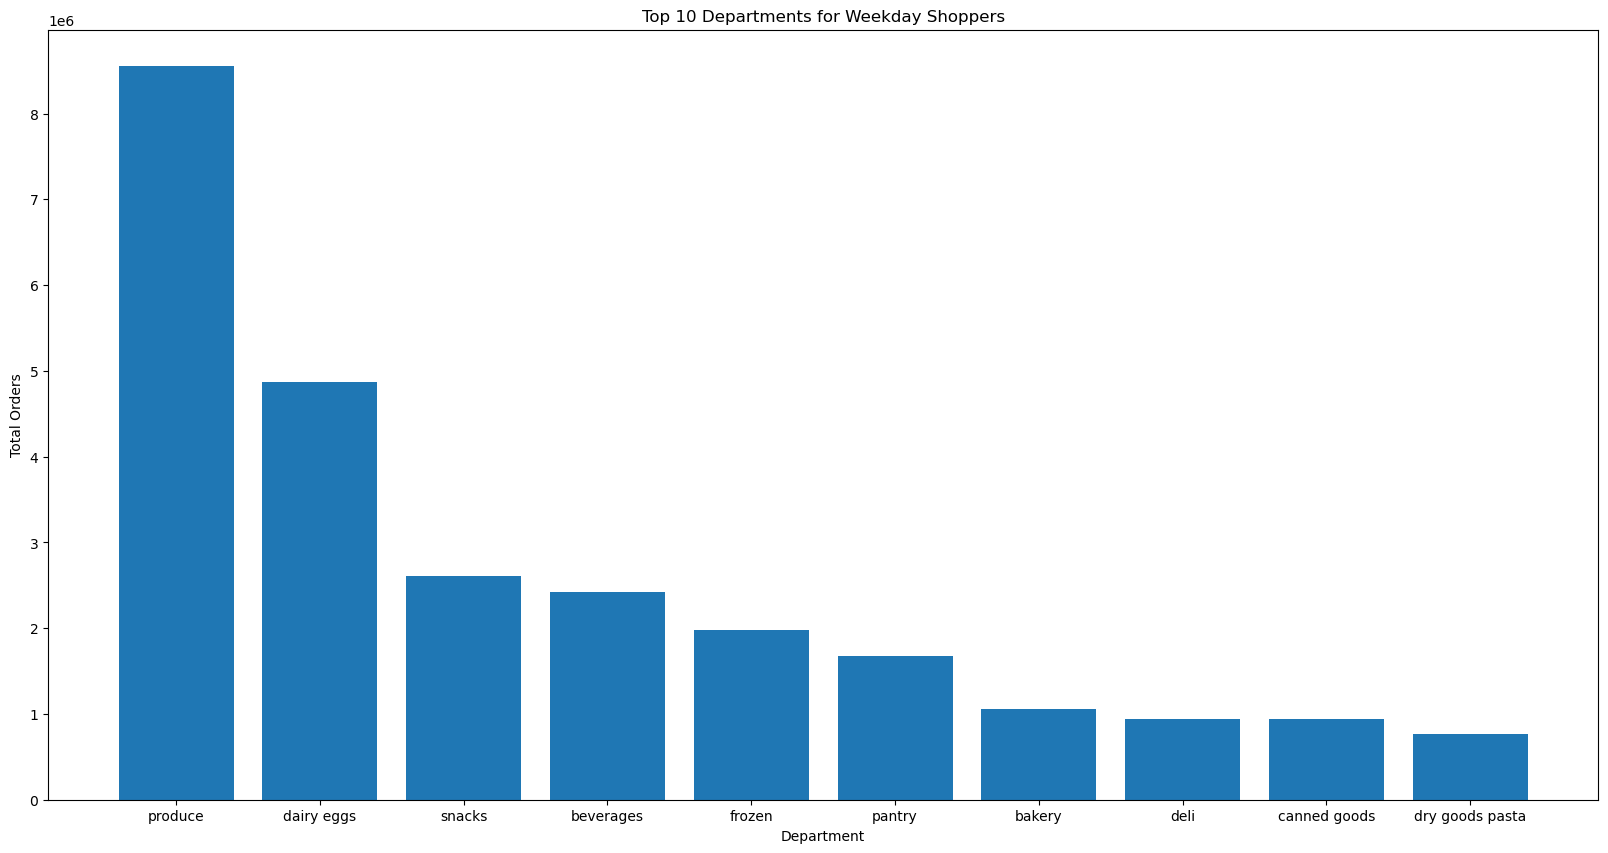

In [194]:
#Plotting a bar chart for the all Departments based on ShopDay
plt.figure(figsize= (20,10))
plt.bar(weekday_shopper_departments.head(10).index,weekday_shopper_departments.head(10).values)
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.title('Top 10 Departments for Weekday Shoppers')

#Export Chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_10_departments_weekday_shoppers.png'))

In [ ]:
#Exporting Barchart as png
line_avd.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_vs_dependants.png'))

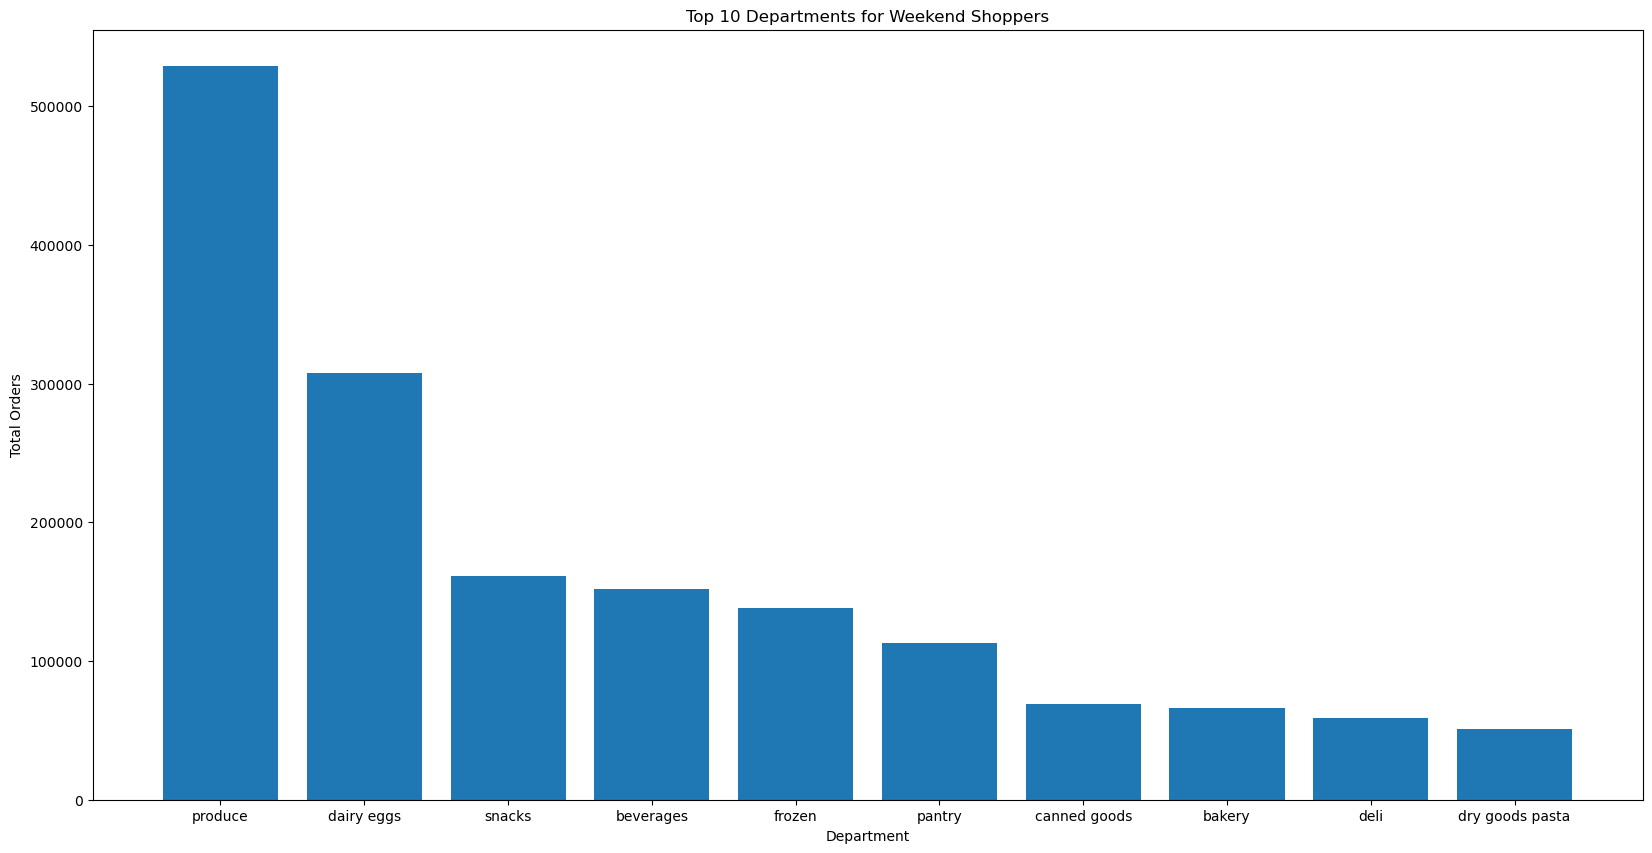

In [190]:
#Plotting a bar chart for the all Departments based on ShopDay
plt.figure(figsize= (20,10))
plt.bar(weekend_shopper_departments.head(10).index,weekend_shopper_departments.head(10).values)
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.title('Top 10 Departments for Weekend Shoppers')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_10_departments_weekend_shoppers.png'))